# **AVC**

## Imports

In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

### lendo data frame

In [2]:
df = pd.read_csv('dados/archive/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Transformando data frame em matriz one hot encoding

In [3]:
# Convertendo colunas categóricas em variáveis dummy
df_ = pd.get_dummies(df)

# Removendo linhas com valores nulos
df_ = df_.dropna()

# Exibindo as primeiras linhas do DataFrame resultante
df_.head()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5,56669,81.0,0,0,186.21,29.0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0


In [4]:
# Removendo as colunas 'id', 'age', 'bmi' e 'avg_glucose_level' do DataFrame
df_ = df_.drop(columns=['id', 'age', 'bmi', 'avg_glucose_level'])

### Hipotese nula

A hipotese nula é a precisão de um modelo tendo como parametro o resultado mais frequente

In [5]:
# Contando os valores da coluna 'stroke'
df_.stroke.value_counts()

0    4700
1     209
Name: stroke, dtype: int64

Descobrimos que nesse caso o valor mais frequente é o "Stroke" como 0. Logo, para descobrirmos a hipotese nula, precisamos realiar a seguinte operação:

$
   H_0 = \frac{n_0}{n}
$

onde:
* H_0 = hipotese nula
* n_0 = quantidade de 0
* n = quantidade total

In [6]:
# Calculando a acurácia de prever o valor nulo na coluna 'stroke'
print("Acurácia nulo: {:.2f}%".format((1 - df_["stroke"].mean()) * 100))

Acurácia nulo: 95.74%


### Separando dados de treino e teste

In [7]:
# Importando as bibliotecas necessárias
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Separando os dados em conjuntos de treino e teste
y = df_['stroke'] # Definindo a variável y como a coluna 'stroke' do dataframe df_
X = df_.drop(['stroke'], axis=1) # Definindo a variável X como todas as colunas do dataframe df_, exceto a coluna 'stroke'
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5) # Separando aleatoriamente X e y em conjuntos de treino e teste usando a função train_test_split da biblioteca Scikit-learn. Neste caso, estamos usando 50% dos dados para treino e 50% para teste.

### Criando modelo através de classificador por avore de decisão

In [8]:
# fazer uma arvore de decisão apartir do modelo de regressão logistica ja feito em cima
from sklearn import tree

# Treinando um modelo de regressão logística
model = DecisionTreeClassifier() # Definindo um objeto da classe LogisticRegression da biblioteca Scikit-learn
model.fit(X_train, y_train) # Treinando o modelo nos dados de treino usando o método fit() do objeto model

# Fazendo previsões nos dados de teste
y_pred = model.predict(X_test) # Usando o método predict() do objeto model para fazer previsões nos dados de teste (X_test) e armazenando o resultado na variável y_pred.

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred) # Calculando a acurácia comparando as respostas verdadeiras (y_test) com as previsões (y_pred) usando a função accuracy_score() da biblioteca Scikit-learn e armazenando o resultado na variável accuracy.
print('Acurácia:', accuracy * 100,"%") # Imprimindo a acurácia na tela.

Acurácia: 95.11201629327903 %


### Plotando a arvore de decisão

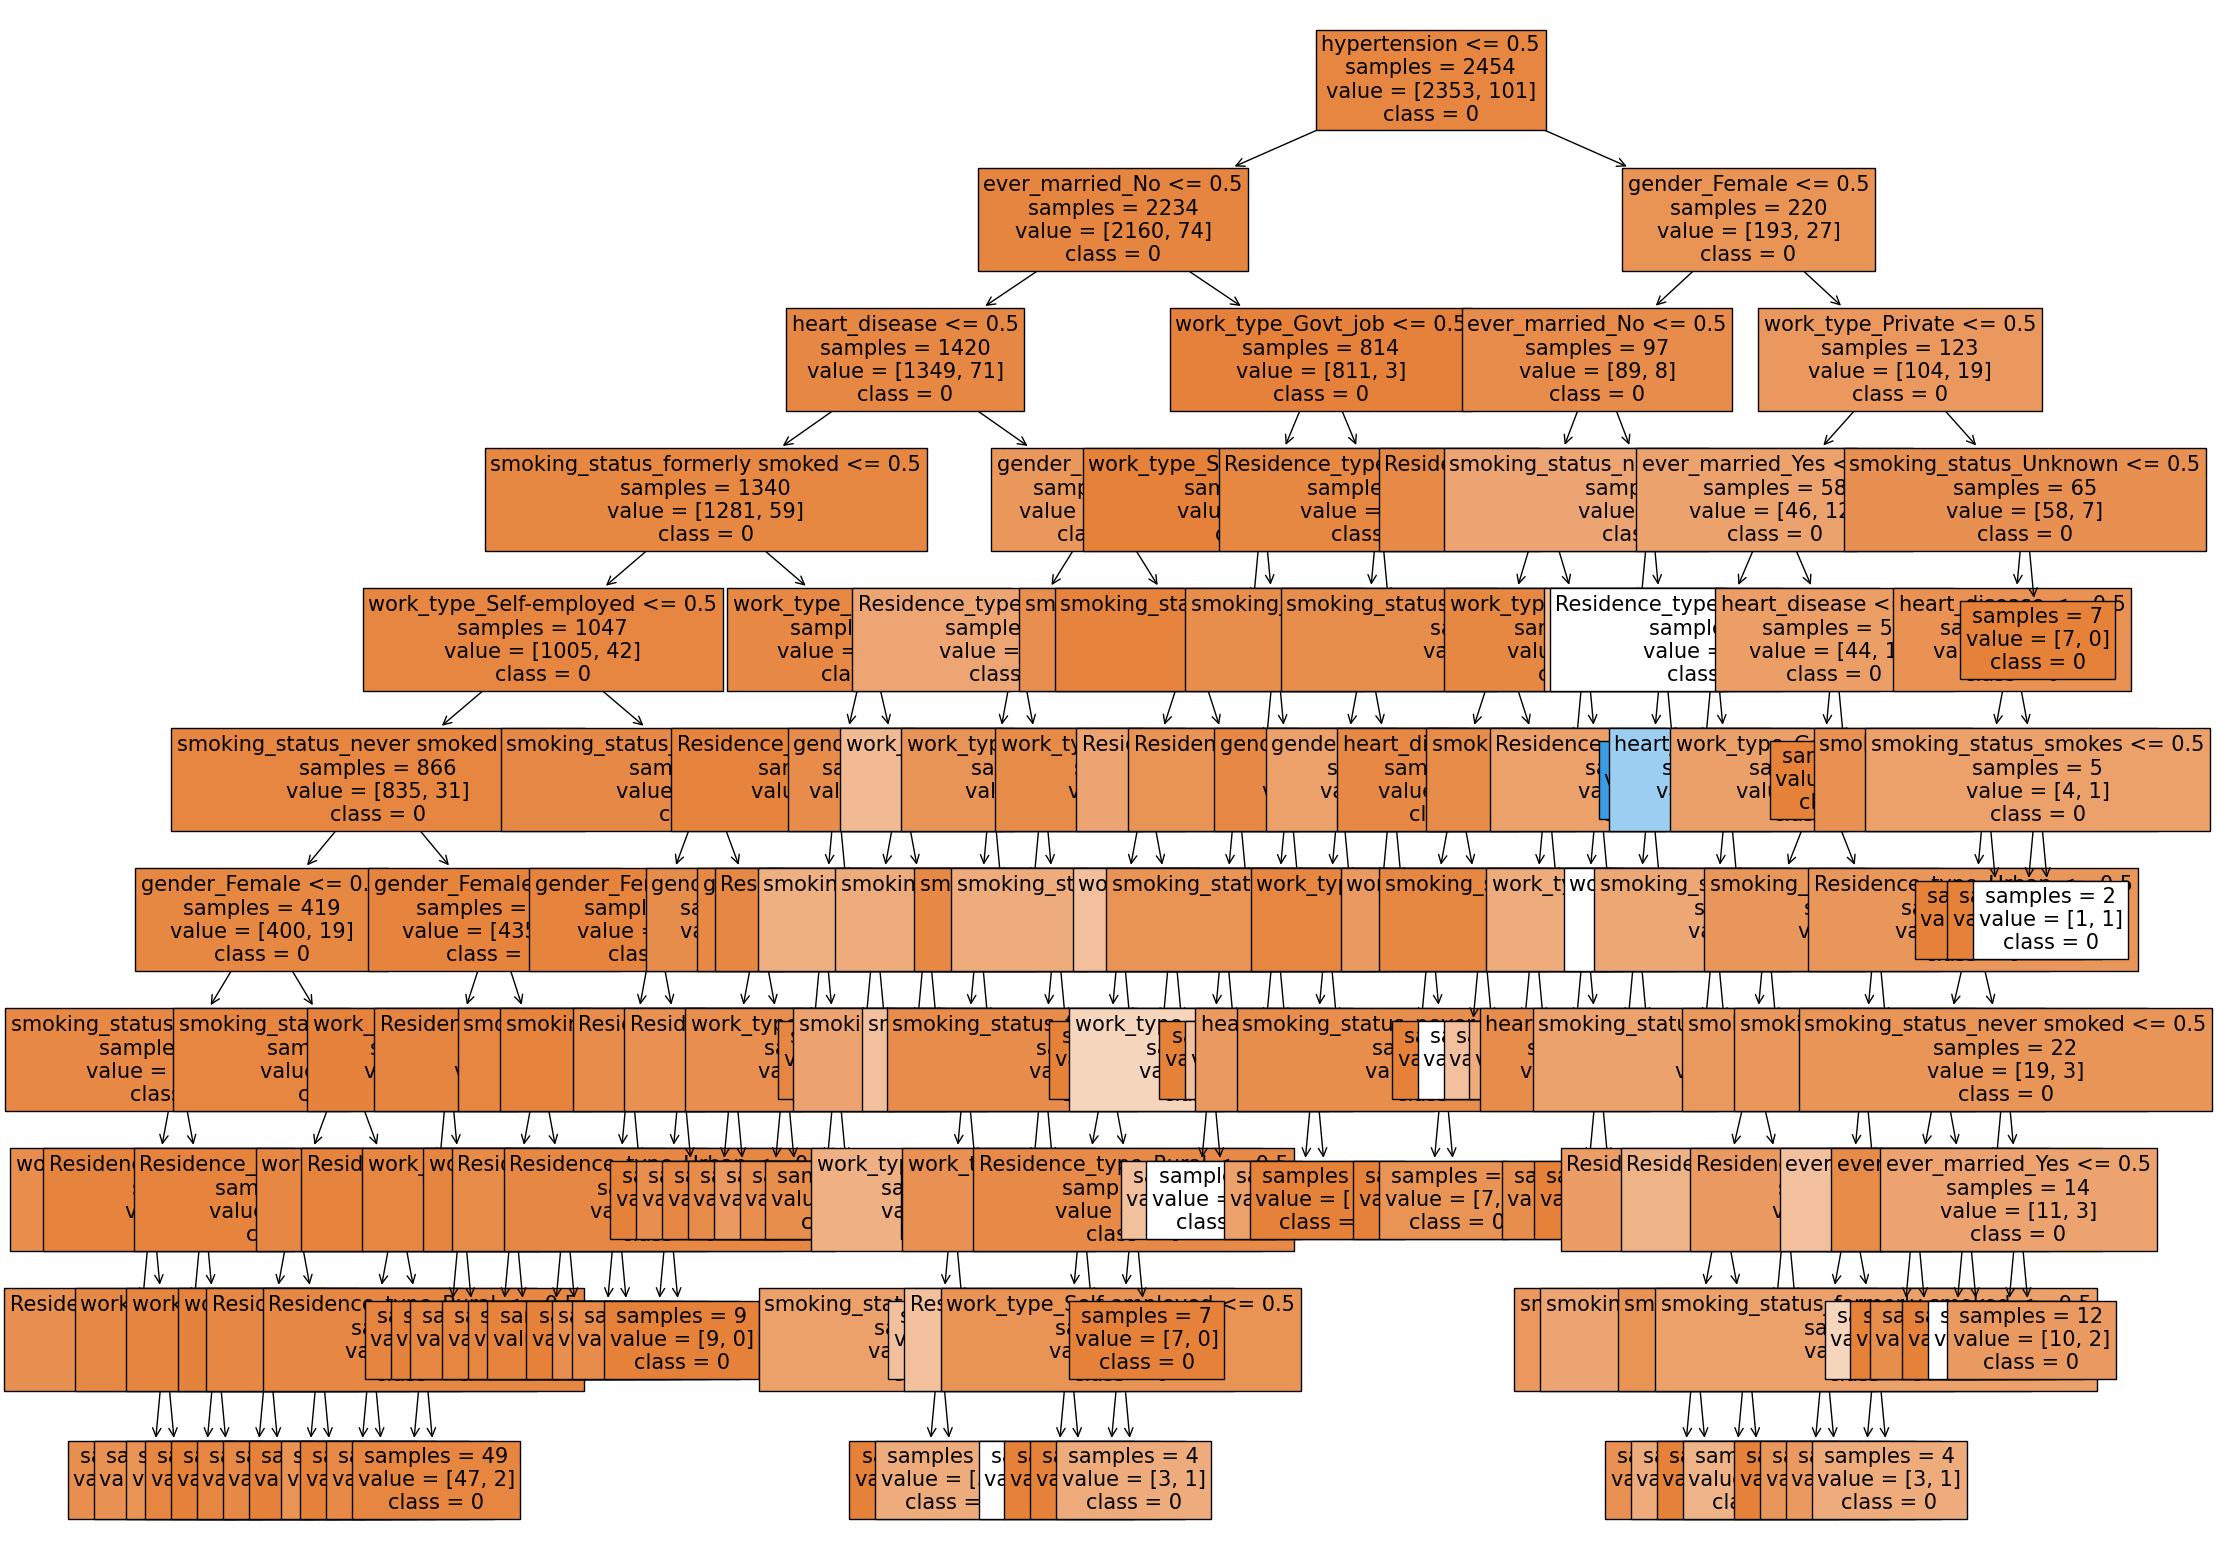

In [9]:
# Configurando a figura para exibir a árvore de decisão
fig = plt.figure(figsize=(25,20))
# Exibindo a árvore de decisão
_ = tree.plot_tree(model, 
                   feature_names=X.columns, 
                   class_names=['0', '1'], 
                   filled=True, 
                   fontsize=15, 
                   node_ids=False, 
                   impurity=False)


### Classificação linear

In [10]:
df = pd.read_csv('dados/archive/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
# Convertendo colunas categóricas em variáveis dummy
df_ = pd.get_dummies(df)

# Removendo linhas com valores nulos
df_ = df_.dropna()

# Exibindo as primeiras linhas do DataFrame resultante
df_.head()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5,56669,81.0,0,0,186.21,29.0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0


In [12]:
# Removendo as colunas 'id', 'age', 'bmi' e 'avg_glucose_level' do DataFrame
df_ = df_.drop(columns=['id', 'age', 'bmi', 'avg_glucose_level'])

In [13]:
# Definindo a função para calcular a acurácia
def accuracy(y_test, y_est):
    return np.mean(np.sign(y_test) == np.sign(y_est))

In [14]:
# Importando as bibliotecas necessárias
import autograd.numpy as np_
from autograd import grad

# Definindo a função de perda
def loss(parametros):
    w, b, pontos, val = parametros
    est = w.T @ pontos + b
    mse = np_.mean((est - val) ** 2)
    return mse

# Obtendo o gradiente da função de perda
g = grad(loss)

# Convertendo os dados de treinamento em numpy arrays e especificando o tipo de dados
X_train = X_train.to_numpy(dtype=np_.float64)
y_train = y_train.to_numpy(dtype=np_.float64)

# Inicializando w e b
w = np_.random.randn(X_train.shape[1], 1).astype(np_.float64)
b = np_.array(0.0, dtype=np_.float64)

# Definindo a taxa de aprendizado
alpha = 10 ** -3

# Treinando o modelo usando descida do gradiente
for n in range(1000):
    grad_ = g((w, b, X_train.T, y_train))
    w -= alpha * grad_[0]
    b -= alpha * grad_[1]

# Exibindo os valores finais de w e b
print(w)
print(b)


[[-1.02396118]
 [ 0.63716113]
 [ 0.09559498]
 [-0.50923095]
 [ 1.21533913]
 [ 0.40360217]
 [ 0.77520765]
 [-0.06115174]
 [ 0.58362593]
 [-0.92240789]
 [-1.58443377]
 [-0.27467142]
 [ 0.68222539]
 [ 1.50138794]
 [-0.66047136]
 [ 0.64404359]
 [-1.06705529]
 [-0.89921522]]
-0.029460453808501902


In [15]:
# Realizando as previsões no conjunto de teste
y_predicao = w.T @ X_test.T + b

# Calculando a acurácia do modelo
acuracia = accuracy(y_predicao, y_test.T)
print(f'Pontos: {acuracia*100} %')


Pontos: 2407    0.0
3179    0.0
4981    0.0
5029    0.0
1846    0.0
       ... 
3911    0.0
690     0.0
769     0.0
53      0.0
2972    0.0
Length: 2455, dtype: float64 %


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
